In [1]:
import pickle as pkl
import pk_plot_library as pplib
import numpy as np
import matplotlib.pyplot as plt

DRAFTPATH = '/Users/cosinga/overleaf/hicolor_draft_two/figures/'
SAVEPATH = '/Users/cosinga/code/hcolor/fig_md_analysis/rvb/'
WEBPATH = '/Users/cosinga/code/calvinosinga.github.io/hicolor/sup_analysis/'
pplib.imports()

def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return
def renorm(dc):
    data = dc.getData()
    data[1] = data[0]**2 * data[1]
    dc.setData(data)
    return dc
from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology('planck15')
def kaiser(z, bias):
    D = cosmo.growthFactor(z, derivative = 0)
    dDdz = cosmo.growthFactor(z, derivative = 1)
    f = -dDdz * (z + 1) / D
    beta = f / bias
    return (1 + 2/3 * beta + 1/5 * beta**2)
def Plin(k, z):
    return cosmo.matterPowerSpectrum(k, z)


ds = pkl.load(open('ds_bias.pkl', 'rb'))
linvals = pkl.load(open('linval.pkl', 'rb'))

# Effect of Neglecting Nonlinear RSDs

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50]


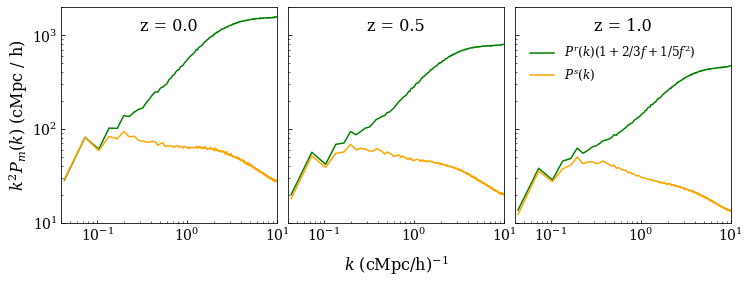

In [2]:
def real_kaiser(dc):
    z = dc.get('redshift')
    data = dc.getData()
    data[1] *= kaiser(z, 1)
    dc.setData(data)
    return dc

ip = {'fieldname':'ptl', 'simname':'tng300', 'ptl_species':'ptl'}
fg = ds.figrid('space', '', 'snapshot', ip)
fg.gspecArgs(wspace = 0.05)
fg.adjustData({'space':'real'}, real_kaiser)
fg.adjustData({},renorm)
fg.plotArgs({'space':'real'}, label = '$P^r (k) (1 + 2/3 f + 1/5 f^2)$')
fg.plotArgs({'space':'redshift'}, label = '$P^s (k)$')
fg.axisArgs(ylim = (10, 2e3))
fg.legendArgs(loc = (0.05, 0.625))
fg.setYLabel("$k^2 P_{m}(k)$ (cMpc / h)")

fg.setDefaultTicksParams()
fg.plot()

In [3]:
# create data containers
from figrid.data_container import DataContainer

ip = {'simname':'tng300', 'fieldname':'ptl', 'space':'redshift', 'ptl_species':'ptl'}
dcip = {'space':'redshift', 'fieldname' : 'model_matter_nlrsds', 'simname':'tng300'}
for ss in [50, 67, 99]:
    for col in ['blue', 'red', 'resolved']:
        ip['snapshot'] = ss
        ptldc = ds.getMatching(ip)
        new_data = ptldc[0].getData().copy()
        biashi = linvals['b']['HI'][ss]
        biasgal = linvals['b'][col][ss]
        cchigal = linvals['cc'][col][ss]
        new_data[1] = new_data[1] * biashi * biasgal * cchigal
        dc = DataContainer(new_data)
        dcip['color'] = col
        dcip['snapshot'] = ss
        dc.update(dcip)
        ds.append(dc)
        

The row values for snapshot: [99, 67, 50]
The column values for color: ['blue', 'red', 'resolved']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


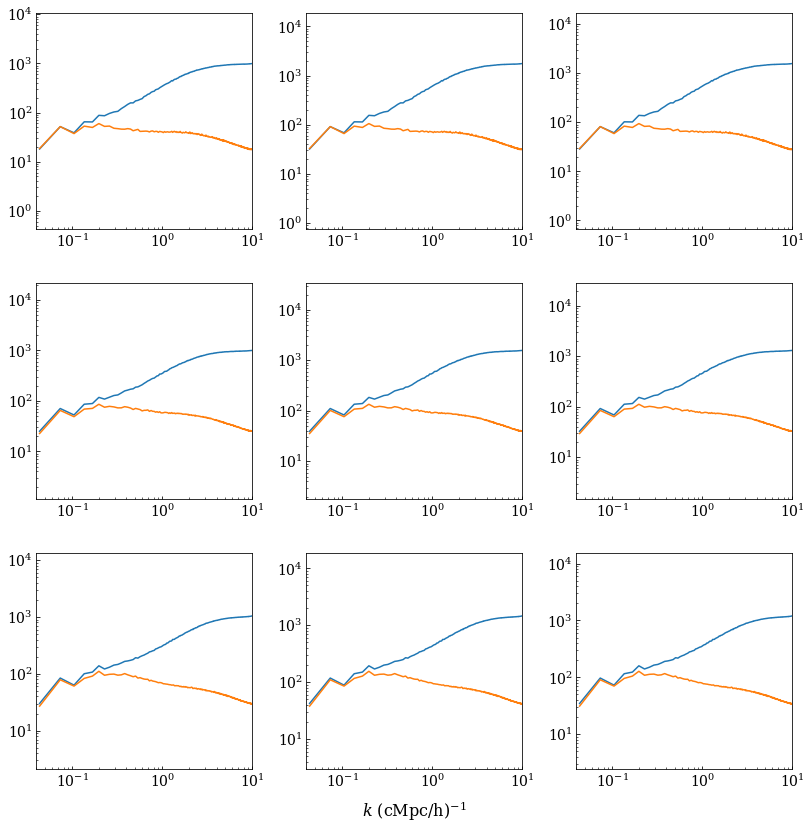

In [12]:
ip = {'simname':'tng300', 'fieldname':['model_fiducial', 'model_matter_nlrsds'], 'color':['blue', 'red', 'resolved']}
modelfg = ds.figrid('fieldname', 'snapshot', 'color', ip)
modelfg.adjustData({}, renorm)
modelfg.colLabels(['']*3)
modelfg.rowLabels(['']*3)
modelfg.plot()

The row values for snapshot: [99, 67, 50]
The column values for color: ['blue', 'red', 'resolved']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


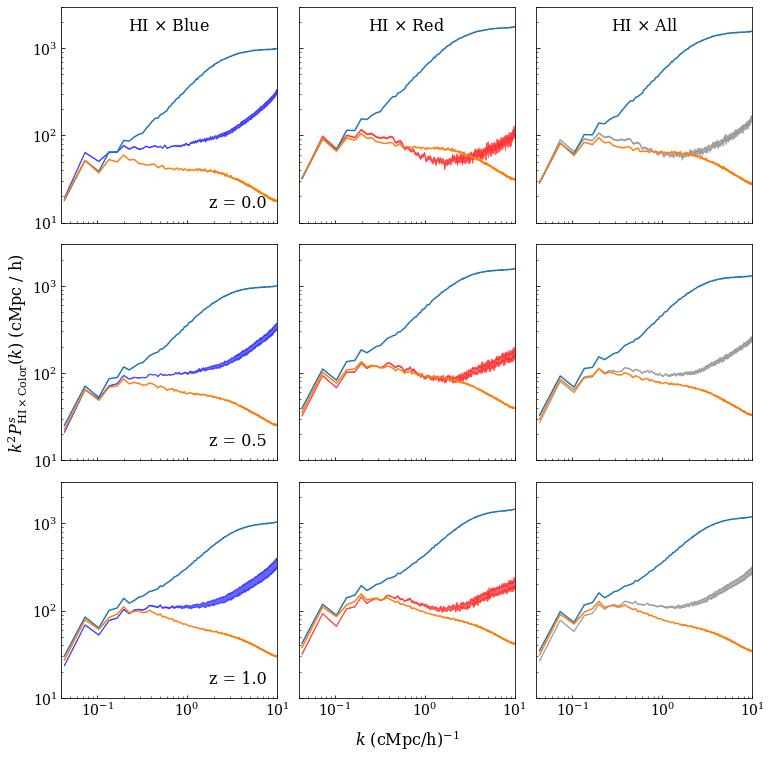

In [13]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng300', 
      'snapshot':[99, 67, 50], 'color_cut':['0.60', '0.55', '0.50', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'post_process':'no key found',
      'mas':'CICW',
     'color':['blue', 'red', 'resolved'], 'space':['redshift']}
fg = ds.figrid('color', 'snapshot', 'color', ip)
fg.gspecArgs(wspace = 0.1, hspace = 0.1)
# fg.plotArgs({'color':'resolved'}, label = 'HI $\\times$ Color')
fg.plotArgs({}, label = '__nolegend__')
# fg.autoNorm({'fieldname':'model_fiducial'})
fg.adjustData({}, renorm)
fg.axisArgs(ylim = (10,3e3))
fg.autoFill(alpha = 0.6)
fg.setYLabel("$k^2 P^s_{\\rm{HI} \\times \\rm{Color}}(k)$ (cMpc / h)")
fg.setDefaultTicksParams()
fg.colLabels(['HI $\\times$ Blue', 'HI $\\times$ Red', 'HI $\\times$ All'])
fg.rowLabels(pos = (0.95, 0.05))
fg.rowLabelArgs(ha = 'right')
fg.legendArgs(rm_legend = True)
fg.plot()
modelfg.plot(axes = fg.axes)